In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dtypes_dict = {'created':'str', 'application_id': 'category', 'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category', 'device_languaje': 'category'}

installs = pd.read_csv('data/train_installs.csv.gzip', parse_dates=['created'], low_memory=False)
installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan
# installs['created'] = pd.to_datetime(installs['created'], format='%Y-%m-%d %H:%M:%S')

In [9]:
dtype_list = {'event_id':np.int16, 'ref_type':'category', 'aplication_id':np.int16, 'atributed':bool, \
              'device_countrycode':'category', 'trans_id':'category', 'device_os':'category', \
              'wifi':object, 'connection_type':'category'}

events = pd.read_csv('data/train_events.csv.gzip', parse_dates= ['date'], low_memory=False)

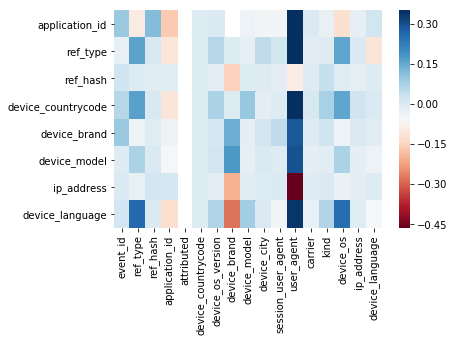

In [12]:
corre = pd.concat([installs, events], axis=1, keys=['installs', 'events']).corr().loc['installs', 'events']
sns.heatmap(corre, cmap='RdBu')

In [13]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'attributed',
       'implicit', 'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [17]:
installs.describe()

,application_id,ref_type,ref_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,3412.000000,3.412000e+03,3.412000e+03,3.412000e+03,1.047000e+03,3.411000e+03,3.412000e+03,3.378000e+03
mean,10.247655,1.736533e+18,4.598202e+18,4.764401e+18,1.877864e+18,4.245276e+18,4.562040e+18,4.915828e+18
std,6.016194,1.936976e+17,2.663828e+18,1.678051e+18,1.886461e+18,2.620844e+18,2.683422e+18,2.477019e+18
min,0.000000,1.494519e+18,4.958527e+15,2.970471e+18,3.083059e+17,5.112505e+16,7.118754e+15,1.101539e+17
25%,7.000000,1.494519e+18,2.268353e+18,2.970471e+18,3.083059e+17,2.331947e+18,2.249197e+18,3.301378e+18
50%,9.000000,1.891515e+18,4.603807e+18,6.333597e+18,2.208835e+18,2.983638e+18,4.436113e+18,3.301378e+18
75%,10.000000,1.891515e+18,6.912404e+18,6.333597e+18,2.523246e+18,6.882415e+18,7.017564e+18,6.977049e+18
max,36.000000,1.891515e+18,9.218934e+18,6.333597e+18,9.169527e+18,9.222450e+18,9.221950e+18,9.028383e+18


In [18]:
installs.head()

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [15]:
events.describe()

,event_id,ref_type,ref_hash,application_id,device_countrycode,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,ip_address,device_language
count,2.494423e+06,2.494423e+06,2.494423e+06,2.494423e+06,2.494423e+06,1.022066e+06,1.164963e+06,2.406456e+06,6.146980e+05,2.482637e+06,1.391527e+06,6.164340e+05,2.489324e+06,6.576670e+05,2.494423e+06,2.406604e+06
mean,9.970445e+01,1.794164e+18,4.641486e+18,9.910934e+01,6.333597e+18,4.986001e+18,1.633891e+18,4.478847e+18,3.832628e+18,4.719312e+18,4.856492e+18,1.470186e+18,5.364362e+18,7.251101e+18,4.620786e+18,5.865447e+18
std,1.070903e+02,1.707944e+17,2.660724e+18,5.780986e+01,1.024000e+03,2.394834e+18,1.626674e+18,2.718014e+18,8.166911e+17,1.769561e+18,2.487552e+18,2.575962e+18,2.242979e+18,5.247066e+17,2.672746e+18,2.281192e+18
min,0.000000e+00,1.494519e+18,1.633675e+14,0.000000e+00,6.333597e+18,1.004084e+16,7.949737e+16,9.530216e+14,4.355428e+16,5.527631e+15,5.072532e+15,2.248157e+17,7.758270e+16,2.748831e+18,5.287755e+12,2.025809e+16
25%,2.200000e+01,1.891515e+18,2.326142e+18,6.300000e+01,6.333597e+18,4.353750e+18,3.083059e+17,2.331947e+18,3.800080e+18,3.819516e+18,2.723465e+18,2.248157e+17,4.647949e+18,6.941825e+18,2.333410e+18,3.301378e+18
50%,3.100000e+01,1.891515e+18,4.688964e+18,6.600000e+01,6.333597e+18,4.353750e+18,5.137992e+17,4.430579e+18,3.800080e+18,3.819516e+18,5.022936e+18,2.248157e+17,5.500848e+18,7.531669e+18,4.541498e+18,6.804428e+18
75%,1.610000e+02,1.891515e+18,6.927594e+18,1.450000e+02,6.333597e+18,7.391844e+18,2.987569e+18,6.882415e+18,3.800080e+18,7.164321e+18,6.840860e+18,1.179587e+18,6.169667e+18,7.531669e+18,7.044307e+18,6.977049e+18
max,7.120000e+02,1.891515e+18,9.223316e+18,3.220000e+02,6.333597e+18,9.135482e+18,9.178260e+18,9.222450e+18,9.205669e+18,9.220949e+18,9.223277e+18,9.182957e+18,9.215473e+18,7.531669e+18,9.223367e+18,9.187882e+18


In [21]:
events['application_id'].value_counts()

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
120     68421
149     60326
10      58311
170     55820
7       48005
8       38972
102     32579
248     31070
54      29284
166     27611
16      24365
125     23018
140     22215
136     15362
119     15282
45      14321
214     10112
134     10003
112      9871
43       9336
        ...  
127         3
62          3
232         3
91          3
135         2
36          2
290         2
49          2
11          2
228         2
209         2
206         2
117         2
188         2
81          2
322         1
25          1
86          1
132         1
146         1
155         1
158         1
165         1
240         1
245         1
255         1
286         1
295         1
305         1
154         1
Name: application_id, Length: 269, dtype: int64

In [42]:
ins_even = pd.merge(installs, events, on='ref_hash', how='inner')

In [54]:
ins_even.drop('kind_x', axis=1, inplace=True)
ins_even.drop('session_user_agent_x', axis=1, inplace=True)
ins_even.drop('wifi_x', axis=1, inplace=True)
ins_even.drop('wifi_y', axis=1, inplace=True)

In [55]:
for colum in ins_even.columns:
    x =  ins_even[colum].value_counts()
    if len(x) <= 20:
        print(colum)
        print(x)
    else: 
        print(colum, 'MEJOR NO')

created MEJOR NO
application_id_x MEJOR NO
ref_type_x
1891515180541284343    36116
1494519392962156891    17041
Name: ref_type_x, dtype: int64
ref_hash MEJOR NO
attributed_x
False    53157
Name: attributed_x, dtype: int64
implicit
False    38866
True     14291
Name: implicit, dtype: int64
device_countrycode_x
6333597102633388268    36732
2970470518450881158    16425
Name: device_countrycode_x, dtype: int64
device_brand_x MEJOR NO
device_model_x MEJOR NO
user_agent_x MEJOR NO
event_uuid_x MEJOR NO
trans_id_x
{hash}    1850
Name: trans_id_x, dtype: int64
ip_address_x MEJOR NO
device_language_x MEJOR NO
date MEJOR NO
event_id MEJOR NO
ref_type_y
1891515180541284343    36116
1494519392962156891    17041
Name: ref_type_y, dtype: int64
application_id_y MEJOR NO
attributed_y
False    53048
True       109
Name: attributed_y, dtype: int64
device_countrycode_y
6333597102633388268    53157
Name: device_countrycode_y, dtype: int64
device_os_version MEJOR NO
device_brand_y MEJOR NO
device_model_y M

In [9]:
installs['trans_id'].isin(events['trans_id']).value_counts()

True     3409
False       3
Name: trans_id, dtype: int64

In [40]:
installs.isin(events).any()

created               False
application_id        False
ref_type               True
ref_hash              False
attributed             True
implicit              False
device_countrycode     True
device_brand           True
device_model           True
session_user_agent    False
user_agent            False
event_uuid            False
kind                  False
wifi                   True
trans_id              False
ip_address             True
device_language        True
dtype: bool

In [76]:
events['device_brand'].value_counts().head(10)
installs['device_brand'].value_counts().head(10)
#print( eve_brand.intersection(ins_brand))
print(events['device_language'].value_counts().head())
print(installs['device_language'].value_counts().head())

6.977049e+18    745898
3.301378e+18    589865
9.028383e+18    388832
6.804428e+18    340624
4.621024e+18    150143
Name: device_language, dtype: int64
3.301378e+18    1484
9.028383e+18     714
4.621024e+18     632
6.977049e+18     238
4.077062e+17      70
Name: device_language, dtype: int64


In [75]:
# brand_in = events['device_brand'].isin(installs['device_brand'])
# len_br = len(brand_in)
# list_index = [index for index in range(len_br) if brand_in[index]]

In [84]:
# brand_in2 = installs['device_brand'].isin(events['device_brand'])
# len_br2 = len(brand_in2)
# list_index2 = [index for index in range(len_br2) if brand_in[index]]

In [5]:
set(installs.columns).intersection(set(events.columns))

{'application_id',
 'attributed',
 'device_brand',
 'device_countrycode',
 'device_language',
 'device_model',
 'event_uuid',
 'ip_address',
 'kind',
 'ref_hash',
 'ref_type',
 'session_user_agent',
 'trans_id',
 'user_agent',
 'wifi'}

In [26]:
# isin1 = events['application_id'].dropna().isin(installs['application_id'].dropna())
# df1 = isin1.loc[isin1 == True]
# print(len(df1))
# isin2 = installs['application_id'].dropna().isin(events['application_id'].dropna())
# df2 = isin2.loc[isin2 == True]
# print(len(df2))
# s2 = events.iloc[df1.keys()]['application_id'].value_counts().reset_index()
# s2.columns = ['application_id', 'app_event']
# s1 = installs.iloc[df2.keys()]['application_id'].value_counts().reset_index()
# s1.columns = ['application_id', 'app_install']
# ins_even = pd.merge(s1, s2, on='application_id', how='inner')

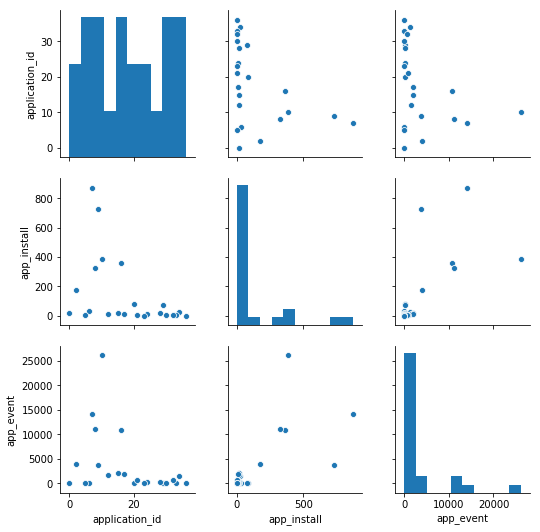

In [13]:
# sns.jointplot("app_event", "app_install", data=ins_even)
# sns.relplot(x="app_install", y="app_event", data=ins_even);
sns.pairplot(ins_even);

In [268]:
ins_even['mean'] = ins_even.mean(axis=1)

In [25]:
# isin1 = events['ip_address'].dropna().isin(installs['ip_address'].dropna())
# df1 = isin1.loc[isin1 == True]
# print(len(df1))
# isin2 = installs['ip_address'].dropna().isin(events['ip_address'].dropna())
# df2 = isin2.loc[isin2 == True]
# print(len(df2))
# s2 = events.iloc[df1.keys()]['ip_address'].value_counts().reset_index()
# s2.columns = ['ip_address', 'ip_event']
# s1 = installs.iloc[df2.keys()]['ip_address'].value_counts().reset_index()
# s1.columns = ['ip_address', 'ip_install']
# ins_even2 = pd.merge(s1, s2, on='ip_address', how='inner')

In [27]:
isin1 = events['device_brand'].dropna().isin(installs['device_brand'].dropna())
df1 = isin1.loc[isin1 == True]
print(len(df1))
isin2 = installs['device_brand'].dropna().isin(events['device_brand'].dropna())
df2 = isin2.loc[isin2 == True]
print(len(df2))
s2 = events.iloc[df1.keys()]['device_brand'].value_counts().reset_index()
s2.columns = ['device_brand', 'device_event']
s1 = installs.iloc[df2.keys()]['device_brand'].value_counts().reset_index()
s1.columns = ['device_brand', 'device_install']
ins_even3 = pd.merge(s1, s2, on='device_brand', how='inner')

1133458
1047


In [34]:
events.loc[events['device_brand'] == ins_even3['device_brand'][0]]['date']

3320      2019-03-10 18:46:56.974
3321      2019-03-10 18:45:23.536
3325      2019-03-11 03:47:22.802
3328      2019-03-13 13:09:22.935
3329      2019-03-13 19:50:31.711
3332      2019-03-13 01:43:35.415
3334      2019-03-13 04:58:34.835
3335      2019-03-11 11:23:54.330
3337      2019-03-12 13:49:44.733
3339      2019-03-12 17:37:17.945
31388     2019-03-11 19:23:50.792
31389     2019-03-11 21:56:49.060
31391     2019-03-11 13:44:48.009
31392     2019-03-12 20:56:40.262
31393     2019-03-12 00:57:48.027
31394     2019-03-12 15:16:30.758
31395     2019-03-12 15:58:29.552
31396     2019-03-12 22:28:25.298
31398     2019-03-12 21:53:28.280
31399     2019-03-12 21:53:19.265
31400     2019-03-12 21:16:04.215
31401     2019-03-12 10:53:31.016
31402     2019-03-12 23:36:49.794
33776     2019-03-12 16:17:30.724
38608     2019-03-07 16:09:35.754
38609     2019-03-07 16:09:34.452
38610     2019-03-07 16:09:47.266
38616     2019-03-07 16:06:27.751
38622     2019-03-07 16:06:24.079
38624     2019

In [26]:
ins_even = pd.merge(installs, events, on='ref_hash', how='inner')